In [46]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import Ridge
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
from yellowbrick.regressor import ResidualsPlot
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
from scipy.stats import normaltest
from scipy.stats import linregress
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.decomposition import PCA
from sklearn.metrics import *
import sklearn.metrics as metrics
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.feature_selection import SequentialFeatureSelector #Para stepwise

# Leer datos de un csv #

In [47]:
archivo1_csv = "train.csv"
datost = pd.read_csv(archivo1_csv, encoding='ISO-8859-1')

# - Analisis Exploratorio #

# Resumen del set de datos #

In [48]:
datost.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [49]:
datost.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [50]:
datost.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# Descripción de Columnas #

1. **Id**: Id con el que está identificada la casa. <br>
2. **MSSubClass**: Tipo de construcción de la propiedad (subclase). <br>
3. **MSZoning**: Zona de uso de la propiedad (residencial, comercial, etc.). <br>
4. **LotFrontage**: Longitud en pies de trozo de calle conectado a la propiedad. <br>
5. **LotArea**: Tamaño del lote en pies cuadrados. <br>
6. **Street**: Tipo de calle donde se encuentra la propiedad. <br>
7. **Alley**: Acceso a la propiedad desde una calle secundaria o callejón. <br>
8. **LotShape**: Forma general de la propiedad. <br>
9. **LandContour**: Planicidad de la propiedad (si es plana, en pendiente, etc.). <br>
10. **Utilities**: Tipo de utilidades disponibles para la propiedad (agua, electricidad, gas, etc.). <br>
11. **LotConfig**: Configuración del lote (si es esquina, interior, etc.). <br>
12. **LandSlope**: Pendiente del terreno (suave, moderado o empinado). <br>
13. **Neighborhood**: Localización de la propiedad en relación con las vecindades cercanas. <br>
14. **Condition1**: Proximidad a una calle principal o carretera. <br>
15. **Condition2**: Proximidad a una segunda calle o carretera si aplica. <br>
16. **BldgType**: Tipo de construcción de la vivienda (casa independiente, adosada, etc.). <br>
17. **HouseStyle**: Estilo arquitectónico de la vivienda. <br>
18. **OverallQual**: Calidad general de los materiales y productos terminados en la construcción. <br>
19. **OverallCond**: Calificación general de la condición del lugar (nuevo, bien mantenido, deteriorado, etc.). <br>
20. **YearBuilt**: Año de construcción de la casa. <br>
21. **YearRemodAdd**: Año en el que se hizo alguna remodelación significativa de la casa. <br>
22. **RoofStyle**: Tipo de techo de la propiedad. <br>
23. **RoofMatl**: Material utilizado en el techo de la vivienda. <br>
24. **Exterior1st**: Primer tipo de revestimiento exterior de la casa. <br>
25. **Exterior2nd**: Segundo tipo de revestimiento exterior si aplica. <br>
26. **MasVnrType**: Tipo de revestimiento de mampostería (piedra, ladrillo, etc.). <br>
27. **MasVnrArea**: Área del revestimiento de mampostería en pies cuadrados. <br>
28. **ExterQual**: Calidad del material exterior de la propiedad. <br>
29. **ExterCond**: Condición del material exterior de la propiedad. <br>
30. **Foundation**: Tipo de cimientos de la casa (ladrillo, hormigón, etc.). <br>
31. **BsmtQual**: Calidad del sótano (si es completo, tiene alta, media o baja calidad). <br>
32. **BsmtCond**: Condición general del sótano. <br>
33. **BsmtExposure**: Si las paredes del sótano están expuestas o a nivel de jardín o salida. <br>
34. **BsmtFinType1**: Calidad del área terminada del sótano. <br>
35. **BsmtFinSF1**: Pies cuadrados del área terminada del sótano. <br>
36. **BsmtFinType2**: Calidad de la segunda área terminada del sótano, si aplica. <br>
37. **BsmtFinSF2**: Pies cuadrados del área terminada de la segunda zona del sótano. <br>
38. **BsmtUnfSF**: Pies cuadrados del sótano sin terminar. <br>
39. **TotalBsmtSF**: Pies cuadrados totales del sótano. <br>
40. **Heating**: Tipo de calefacción de la casa. <br>
41. **HeatingQC**: Calidad y condición del sistema de calefacción. <br>
42. **CentralAir**: Si la propiedad cuenta con aire acondicionado central. <br>
43. **Electrical**: Tipo de sistema eléctrico de la vivienda. <br>
44. **1stFlrSF**: Pies cuadrados del primer piso de la casa. <br>
45. **2ndFlrSF**: Pies cuadrados del segundo piso de la casa. <br>
46. **LowQualFinSF**: Pies cuadrados con acabados de baja calidad en todos los pisos. <br>
47. **GrLivArea**: Pies cuadrados de superficie habitable sobre el nivel del suelo. <br>
48. **BsmtFullBath**: Número de baños completos en el sótano. <br>
49. **BsmtHalfBath**: Número de baños a medio terminar en el sótano. <br>
50. **FullBath**: Número de baños completos fuera del sótano. <br>
51. **HalfBath**: Número de baños a medio terminar fuera del sótano. <br>
52. **BedroomAbvGr**: Número de dormitorios fuera del sótano. <br>
53. **KitchenAbvGr**: Número de cocinas fuera del sótano. <br>
54. **KitchenQual**: Calidad de la cocina. <br>
55. **TotRmsAbvGrd**: Número total de habitaciones fuera del sótano. <br>
56. **Functional**: Calificación de la funcionalidad de la casa (por ejemplo, si la distribución es adecuada). <br>
57. **Fireplaces**: Número de chimeneas en la propiedad. <br>
58. **FireplaceQu**: Calidad de las chimeneas. <br>
59. **GarageType**: Ubicación del garaje (integrado, separado, etc.). <br>
60. **GarageYrBlt**: Año en el que fue construido el garaje. <br>
61. **GarageFinish**: Acabado interior del garaje. <br>
62. **GarageCars**: Número de coches que el garaje puede albergar. <br>
63. **GarageArea**: Tamaño del garaje en pies cuadrados. <br>
64. **GarageQual**: Calidad del garaje. <br>
65. **GarageCond**: Condición del garaje. <br>
66. **PavedDrive**: Si la propiedad tiene un camino pavimentado. <br>
67. **WoodDeckSF**: Área cubierta de madera en pies cuadrados. <br>
68. **OpenPorchSF**: Área del porche abierto en pies cuadrados. <br>
69. **EnclosedPorch**: Área cerrada del porche en pies cuadrados. <br>
70. **3SsnPorch**: Área del porche de tres estaciones. <br>
71. **ScreenPorch**: Área del porche con malla o red en pies cuadrados. <br>
72. **PoolArea**: Área de la piscina en pies cuadrados. <br>
73. **PoolQC**: Calidad de la piscina. <br>
74. **Fence**: Calidad de la cerca de la propiedad. <br>
75. **MiscFeature**: Características no cubiertas en otras categorías (por ejemplo, ascensor, terraza, etc.). <br>
76. **MiscVal**: Valor de las características adicionales no cubiertas en otras categorías. <br>
77. **MoSold**: Mes en el que se vendió la propiedad. <br>
78. **YrSold**: Año en el que se vendió la propiedad. <br>
79. **SaleType**: Tipo de venta de la propiedad (por ejemplo, venta normal, subasta, etc.). <br>
80. **SaleCondition**: Condición de la venta (por ejemplo, si fue una venta de remate o en condiciones especiales). <br>
81. **SalePrice**: Precio de venta de la casa. <br>


In [51]:
datost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [52]:
datost.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [53]:
datost.duplicated().sum()

0

# Obtenemos las columnas con datos Numericos #

In [54]:
# Obtener los nombres de las columnas numericas
columnas_numericas = datost.select_dtypes(include=['number']).columns.tolist()
columnas_numericas.remove('Id')

# Obtener los nombres de las columnas no numéricas
columnas_no_numericas = datost.select_dtypes(exclude=['number']).columns.tolist()
print("Columnas numéricas:")
print(columnas_numericas)

print("\nColumnas no numéricas:")
print(columnas_no_numericas)

numericast = datost[columnas_numericas]
#numericasp = datosp[columnas_numericas]



Columnas numéricas:
['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

Columnas no numéricas:
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu

# Obtenemos las columnas numericas con datos faltantes #

In [55]:
def count_empty_values_per_column(df):
    total_rows = len(df)
    missing_values = df.isna().sum()
    missing_values = missing_values[missing_values > 0]  # Filtrar solo columnas con valores faltantes
    
    if missing_values.empty:
        print("No hay valores faltantes en el DataFrame.")
    else:
        missing_percentage = (missing_values / total_rows) * 100
        missing_info = pd.DataFrame({
            'Valores Faltantes': missing_values,
            'Proporción (%)': missing_percentage
        })
        print("Número de valores faltantes por columna y su proporción respecto al total de filas:")
        print(missing_info)

#Columnas del df de train con filas vacias
count_empty_values_per_column(numericast)

Número de valores faltantes por columna y su proporción respecto al total de filas:
             Valores Faltantes  Proporción (%)
LotFrontage                259       17.739726
MasVnrArea                   8        0.547945
GarageYrBlt                 81        5.547945


In [56]:
#Columnas del df de test con filas vacias
#count_empty_values_per_column(numericasp)

# Como de bien describen las variables numericas al precio de venta? #

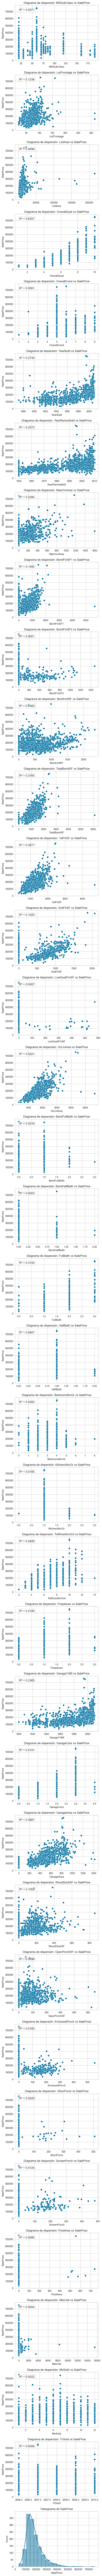

In [57]:
def plot_scatter_and_hist(df, x_columns, y_column):
    num_plots = len(x_columns)
    fig, axes = plt.subplots(num_plots + 1, 1, figsize=(6, 4 * (num_plots + 1)))
    
    if num_plots == 1:
        axes = [axes]  # Asegurar que axes es iterable
    
    # Generar diagramas de dispersión y calcular R²
    for i, x_col in enumerate(x_columns):
        sns.scatterplot(data=df, x=x_col, y=y_column, ax=axes[i])
        axes[i].set_title(f'Diagrama de dispersión: {x_col} vs {y_column}')
        
        # Calcular R²
        valid_data = df[[x_col, y_column]].dropna()
        if not valid_data.empty:
            slope, intercept, r_value, _, _ = linregress(valid_data[x_col], valid_data[y_column])
            r_squared = r_value ** 2
            axes[i].text(0.05, 0.9, f'R² = {r_squared:.4f}', transform=axes[i].transAxes, fontsize=12, 
                         bbox=dict(facecolor='white', alpha=0.5))
    
    # Generar histograma de y_column
    sns.histplot(df[y_column], bins=20, kde=True, ax=axes[-1])
    axes[-1].set_title(f'Histograma de {y_column}')
    
    plt.tight_layout()
    plt.show()

cand = columnas_numericas
#print(cand)
cand.remove('SalePrice')
plot_scatter_and_hist(numericast, cand, 'SalePrice')

In [58]:
# Seleccionar las variables clave
columnas_numericas = ['SalePrice', 'OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars', 
        'GarageArea', '1stFlrSF', 'YearBuilt', 'YearRemodAdd', 'FullBath', 
        'TotRmsAbvGrd', 'Fireplaces', 'LotArea', 'MasVnrArea', 'BsmtFullBath', 
        'MoSold', 'YrSold']

datos_numericos = datost[columnas_numericas]  # Crear nuevo dataframe con las variables seleccionadas

# Mostrar las primeras filas para verificar
datos_numericos.head()



,SalePrice,OverallQual,GrLivArea,TotalBsmtSF,GarageCars,GarageArea,1stFlrSF,YearBuilt,YearRemodAdd,FullBath,TotRmsAbvGrd,Fireplaces,LotArea,MasVnrArea,BsmtFullBath,MoSold,YrSold
0,208500,7,1710,856,2,548,856,2003,2003,2,8,0,8450,196.0,1,2,2008
1,181500,6,1262,1262,2,460,1262,1976,1976,2,6,1,9600,0.0,0,5,2007
2,223500,7,1786,920,2,608,920,2001,2002,2,6,1,11250,162.0,1,9,2008
3,140000,7,1717,756,3,642,961,1915,1970,1,7,1,9550,0.0,1,2,2006
4,250000,8,2198,1145,3,836,1145,2000,2000,2,9,1,14260,350.0,1,12,2008


*Preprocesamiento del dataset*

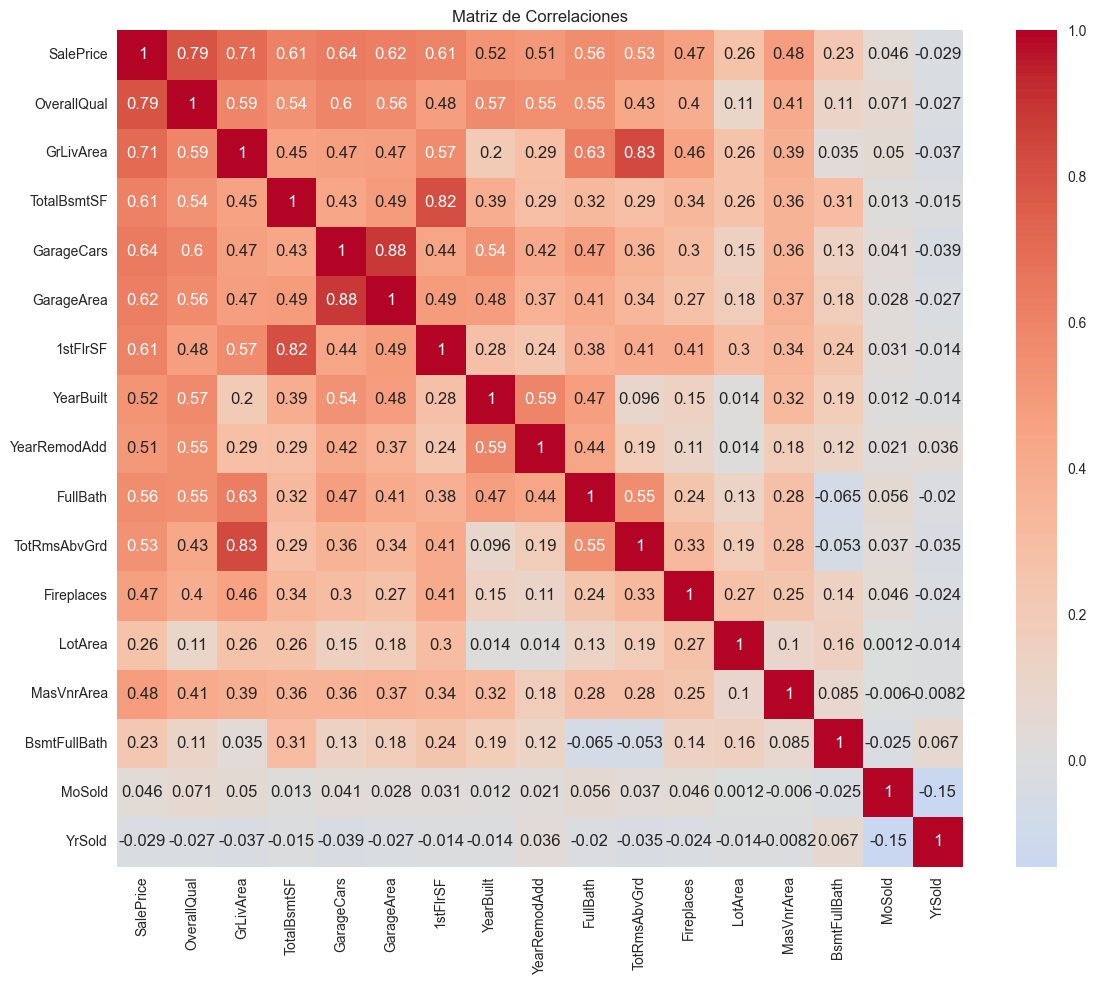

In [59]:
def hopkins_statistic(X):
    X = np.asarray(X)
    n_samples = len(X)
    n_dims = X.shape[1]

    X_uniform = np.random.uniform(
        np.min(X, axis=0),
        np.max(X, axis=0),
        size=(n_samples, n_dims)
    )
    

    neigh = NearestNeighbors(n_neighbors=2)
    neigh.fit(X)
    
    # Distancias para puntos reales
    u_distances, _ = neigh.kneighbors(X_uniform, n_neighbors=1)
    w_distances, _ = neigh.kneighbors(X, n_neighbors=2)
    
    # Calcular estadístico de Hopkins
    u_sum = np.sum(u_distances)
    w_sum = np.sum(w_distances[:, 1])  
    
    return u_sum / (u_sum + w_sum)

# Seleccionar las columnas numéricas
X = datos_numericos[columnas_numericas]

# Calcular matriz de correlaciones
corr_matrix = X.corr()


plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlaciones')
plt.tight_layout()
plt.show()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

<p>Observando la matriz de correlacíon podemos ver que hay varias columnas que no tienen una buena correlación con la variable SalePrice, la cual es la que nos interesa evaluar para los futuros modelos son:</p>
1. YrSold <br>
2. MoSold <br>
3. BsmlFullBath <br>
4. MasVnrArea <br>
5. LotArea <br>
6. FirePlace <br>


In [60]:
# Seleccionar las variables clave
columnas_numericas = ['SalePrice', 'OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars', 
                      'GarageArea', '1stFlrSF', 'YearBuilt', 'YearRemodAdd', 'FullBath', 
                      'TotRmsAbvGrd']

datos_numericos = datost[columnas_numericas]  # Crear nuevo dataframe con las variables seleccionadas

# Mostrar las primeras filas para verificar
columnas_con_nulos = datos_numericos.columns[datos_numericos.isnull().any()]

# Rellenar los valores nulos con la mediana de cada columna
datos_numericos[columnas_con_nulos] = datos_numericos[columnas_con_nulos].fillna(datos_numericos[columnas_con_nulos].median())
numericast[columnas_con_nulos] =datos_numericos[columnas_con_nulos].fillna(datos_numericos[columnas_con_nulos].median())
# Verificar que no haya valores nulos
print(datos_numericos.isnull().sum())
print(datos_numericos.head())


SalePrice       0
OverallQual     0
GrLivArea       0
TotalBsmtSF     0
GarageCars      0
GarageArea      0
1stFlrSF        0
YearBuilt       0
YearRemodAdd    0
FullBath        0
TotRmsAbvGrd    0
dtype: int64
   SalePrice  OverallQual  GrLivArea  TotalBsmtSF  GarageCars  GarageArea  \
0     208500            7       1710          856           2         548   
1     181500            6       1262         1262           2         460   
2     223500            7       1786          920           2         608   
3     140000            7       1717          756           3         642   
4     250000            8       2198         1145           3         836   

   1stFlrSF  YearBuilt  YearRemodAdd  FullBath  TotRmsAbvGrd  
0       856       2003          2003         2             8  
1      1262       1976          1976         2             6  
2       920       2001          2002         2             6  
3       961       1915          1970         1             7  
4      1145

In [61]:
X = datos_numericos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [62]:
hopkins_score = hopkins_statistic(X_scaled)
print(f"Estadístico de Hopkins: {hopkins_score:.3f}")

Estadístico de Hopkins: 0.897


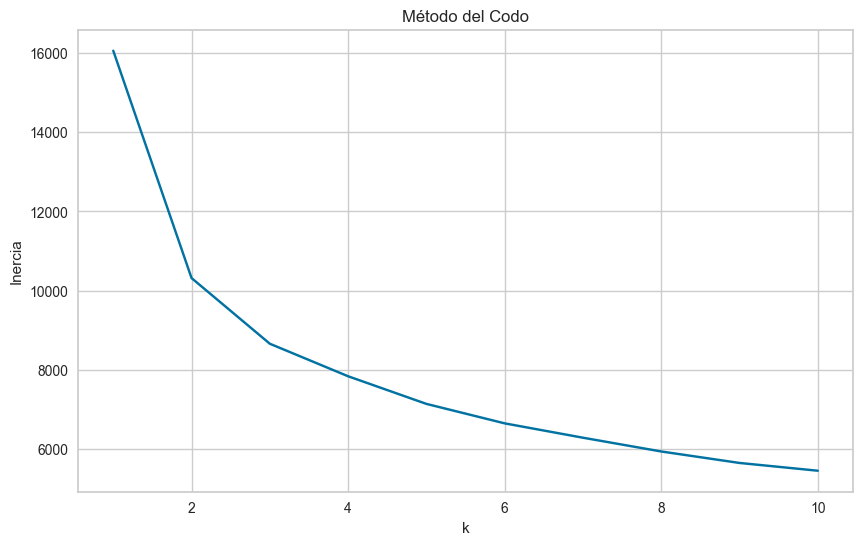

In [63]:

inertias = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.grid(True)
plt.show()

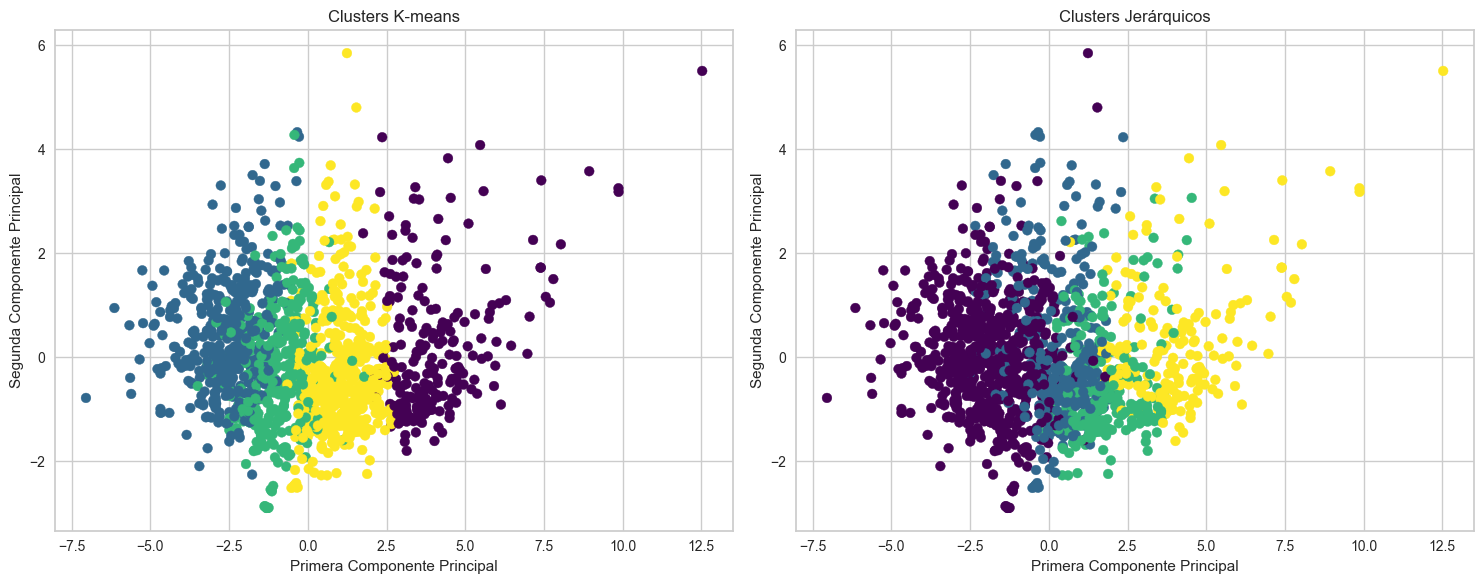


Tamaño de los clusters:

K-means:
Cluster 0: 219 elementos
Cluster 1: 422 elementos
Cluster 2: 329 elementos
Cluster 3: 490 elementos

Jerárquico:
Cluster 0: 671 elementos
Cluster 1: 339 elementos
Cluster 2: 258 elementos
Cluster 3: 192 elementos

Comparación de tamaños de clusters:
           K-means  Jerárquico
Cluster 0      219         671
Cluster 1      422         339
Cluster 2      329         258
Cluster 3      490         192

Características promedio de cada cluster:

K-means:

Cluster 0 (219 elementos):
SalePrice: 317600.95
OverallQual: 8.09
GrLivArea: 2201.45
TotalBsmtSF: 1643.04
GarageCars: 2.72
GarageArea: 761.30
1stFlrSF: 1684.32
YearBuilt: 1995.41
YearRemodAdd: 2001.08
FullBath: 2.07
TotRmsAbvGrd: 8.21

Cluster 1 (422 elementos):
SalePrice: 119743.86
OverallQual: 5.04
GrLivArea: 1174.16
TotalBsmtSF: 817.77
GarageCars: 0.82
GarageArea: 235.21
1stFlrSF: 930.67
YearBuilt: 1946.67
YearRemodAdd: 1970.79
FullBath: 1.14
TotRmsAbvGrd: 5.74

Cluster 2 (329 elementos):
SalePrice

C:\Users\sebas\AppData\Local\Temp\ipykernel_9292\3153872147.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_numericos['Cluster_KMeans'] = clusters_kmeans
C:\Users\sebas\AppData\Local\Temp\ipykernel_9292\3153872147.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_numericos['Cluster_Hierarchical'] = clusters_jerarquico


In [64]:
k_optimo = 4

kmeans = KMeans(n_clusters=k_optimo, random_state=42, n_init=10)
clusters_kmeans = kmeans.fit_predict(X_scaled)
Z = linkage(X_scaled, method='ward')

clusters_jerarquico = fcluster(Z, k_optimo, criterion='maxclust')
clusters_jerarquico = clusters_jerarquico - 1

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(15, 6))

# K-means
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_kmeans, cmap='viridis')
plt.title('Clusters K-means')
plt.xlabel('Primera Componente Principal')
plt.ylabel('Segunda Componente Principal')

# Clustering Jerárquico
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_jerarquico, cmap='viridis')
plt.title('Clusters Jerárquicos')
plt.xlabel('Primera Componente Principal')
plt.ylabel('Segunda Componente Principal')

plt.tight_layout()
plt.show()



print("\nTamaño de los clusters:")
print("\nK-means:")
for i in range(k_optimo):
    print(f"Cluster {i}: {np.sum(clusters_kmeans == i)} elementos")

print("\nJerárquico:")
for i in range(k_optimo):
    print(f"Cluster {i}: {np.sum(clusters_jerarquico == i)} elementos")


datos_numericos['Cluster_KMeans'] = clusters_kmeans
datos_numericos['Cluster_Hierarchical'] = clusters_jerarquico

sizes_comparison = pd.DataFrame({
    'K-means': [np.sum(clusters_kmeans == i) for i in range(k_optimo)],
    'Jerárquico': [np.sum(clusters_jerarquico == i) for i in range(k_optimo)]
}, index=[f'Cluster {i}' for i in range(k_optimo)])

print("\nComparación de tamaños de clusters:")
print(sizes_comparison)

print("\nCaracterísticas promedio de cada cluster:")

print("\nK-means:")
for i in range(k_optimo):
    cluster_data = datos_numericos[datos_numericos['Cluster_KMeans'] == i]
    print(f"\nCluster {i} ({len(cluster_data)} elementos):")
    means = cluster_data[columnas_numericas].mean()
    for col, mean in means.items():
        print(f"{col}: {mean:.2f}")

print("\nJerárquico:")
for i in range(k_optimo):
    cluster_data = datos_numericos[datos_numericos['Cluster_Hierarchical'] == i]
    print(f"\nCluster {i} ({len(cluster_data)} elementos):")
    means = cluster_data[columnas_numericas].mean()
    for col, mean in means.items():
        print(f"{col}: {mean:.2f}")

In [65]:
# 5. Cálculo de siluetas
silhouette_kmeans = silhouette_score(X_scaled, clusters_kmeans)
silhouette_jerarquico = silhouette_score(X_scaled, clusters_jerarquico)

print(f"\nSilueta K-means: {silhouette_kmeans:.3f}")
print(f"Silueta Jerárquico: {silhouette_jerarquico:.3f}")

# Guardar los clusters en el DataFrame original
datos_numericos['Cluster_KMeans'] = clusters_kmeans
datos_numericos['Cluster_Hierarchical'] = clusters_jerarquico


Silueta K-means: 0.206
Silueta Jerárquico: 0.184


C:\Users\sebas\AppData\Local\Temp\ipykernel_9292\1205492830.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_numericos['Cluster_KMeans'] = clusters_kmeans
C:\Users\sebas\AppData\Local\Temp\ipykernel_9292\1205492830.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_numericos['Cluster_Hierarchical'] = clusters_jerarquico


In [66]:
# Gráfico de siluetas
def plot_silhouette(X, cluster_labels, title):
    n_clusters = len(np.unique(cluster_labels))
    
    silhouette_vals = silhouette_samples(X, cluster_labels)
    
    plt.figure(figsize=(10, 6))
    y_lower = 10
    
    for i in range(n_clusters):
        cluster_silhouette_vals = silhouette_vals[cluster_labels == i]
        cluster_silhouette_vals.sort()
        
        size_cluster_i = cluster_silhouette_vals.shape[0]
        y_upper = y_lower + size_cluster_i
        
        color = plt.cm.viridis(float(i) / n_clusters)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                         0, cluster_silhouette_vals,
                         facecolor=color, alpha=0.7)
        
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, f'Cluster {i}')
        y_lower = y_upper + 10
    
    avg_score = np.mean(silhouette_vals)
    plt.axvline(x=avg_score, color="red", linestyle="--", 
                label=f'Promedio: {avg_score:.3f}')
    
    plt.title(title)
    plt.xlabel('Coeficiente de Silueta')
    plt.ylabel('Cluster')
    plt.legend(loc='lower right')
    plt.tight_layout()

Análisis de Siluetas:


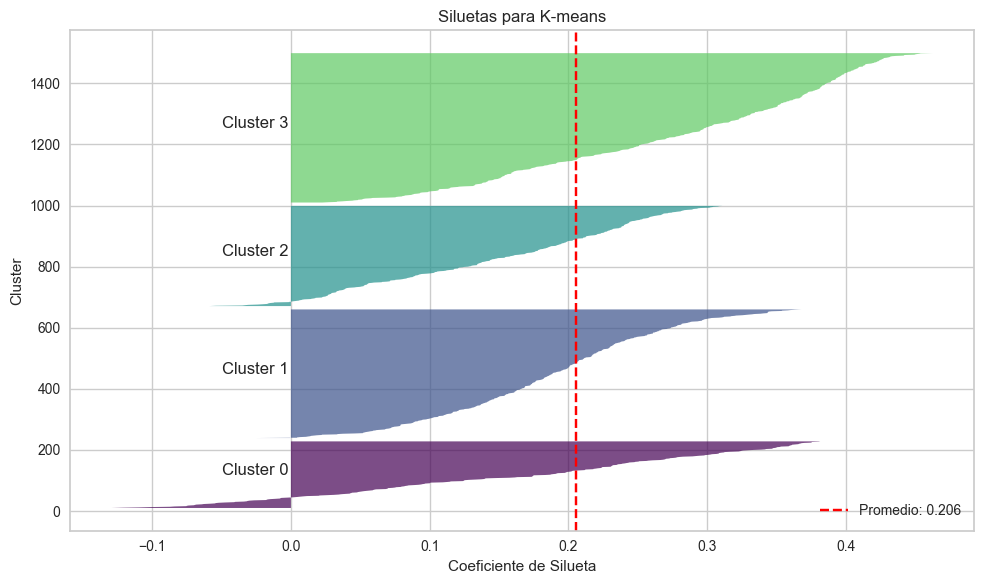

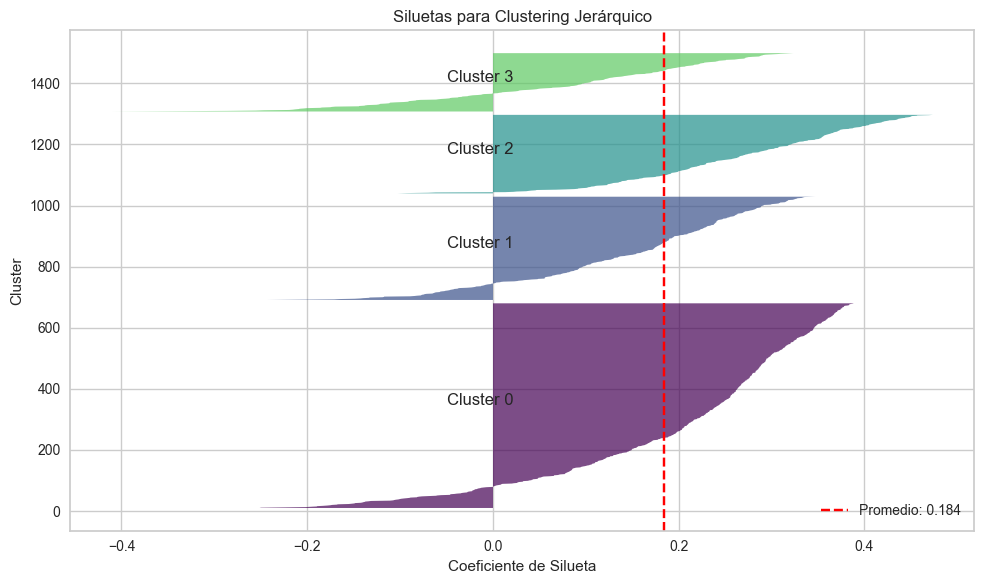

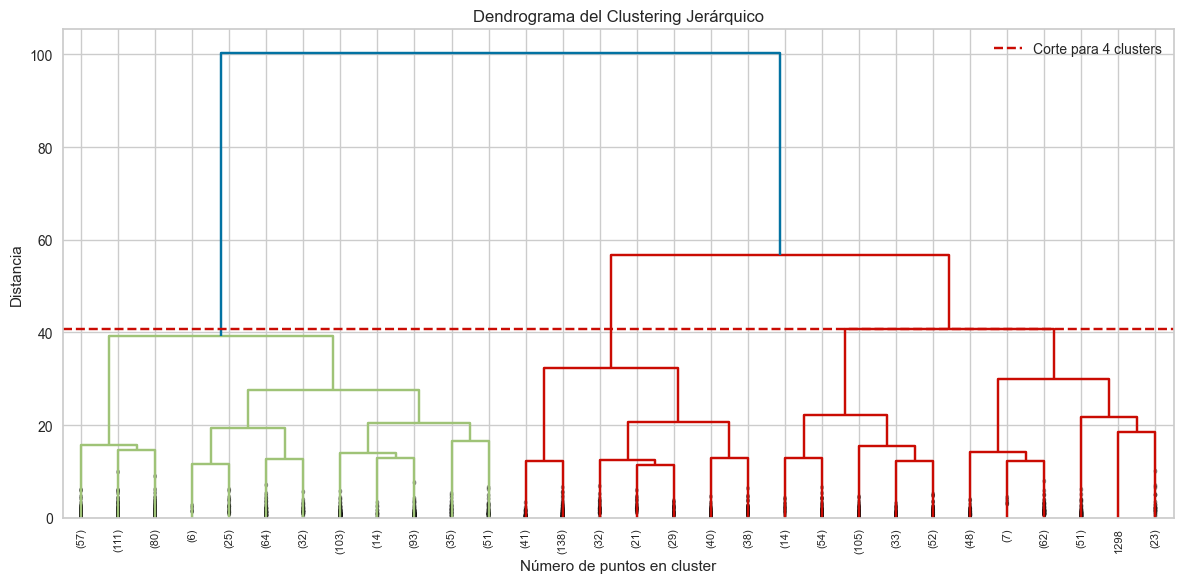

In [67]:

print("Análisis de Siluetas:")
plot_silhouette(X_scaled, clusters_kmeans, 'Siluetas para K-means')
plt.show()

plot_silhouette(X_scaled, clusters_jerarquico, 'Siluetas para Clustering Jerárquico')
plt.show()

# Generar y visualizar dendrograma
plt.figure(figsize=(12, 6))
dendrogram(Z, 
          truncate_mode='lastp',  # Mostrar solo los últimos p grupos
          p=30,  # Número de grupos a mostrar
          leaf_rotation=90,
          leaf_font_size=8,
          show_contracted=True)

plt.title('Dendrograma del Clustering Jerárquico')
plt.xlabel('Número de puntos en cluster')
plt.ylabel('Distancia')
plt.axhline(y=Z[-(k_optimo-1), 2], color='r', linestyle='--', 
            label=f'Corte para {k_optimo} clusters')
plt.legend()
plt.tight_layout()
plt.show()

In [68]:
datos_numericos['Cluster_KMeans'] = clusters_kmeans
datos_numericos['Cluster_Hierarchical'] = clusters_jerarquico

# Estadísticas descriptivas por cluster (K-means)
print("\nEstadísticas por cluster (K-means):")
for cluster in range(k_optimo):
    print(f"\nCluster {cluster}:")
    cluster_data = datos_numericos[datos_numericos['Cluster_KMeans'] == cluster]
    print(cluster_data[columnas_numericas].describe())


Estadísticas por cluster (K-means):

Cluster 0:
           SalePrice  OverallQual    GrLivArea  TotalBsmtSF  GarageCars  \
count     219.000000   219.000000   219.000000   219.000000  219.000000   
mean   317600.945205     8.086758  2201.452055  1643.036530    2.721461   
std     89045.075645     0.927044   601.356678   504.552066    0.478957   
min    147000.000000     5.000000  1344.000000   710.000000    2.000000   
25%    260200.000000     8.000000  1723.000000  1365.000000    2.000000   
50%    302000.000000     8.000000  2078.000000  1624.000000    3.000000   
75%    350000.000000     9.000000  2520.000000  1837.000000    3.000000   
max    755000.000000    10.000000  5642.000000  6110.000000    4.000000   

        GarageArea     1stFlrSF    YearBuilt  YearRemodAdd    FullBath  \
count   219.000000   219.000000   219.000000    219.000000  219.000000   
mean    761.296804  1684.324201  1995.406393   2001.077626    2.068493   
std     161.227085   423.696457    22.195631      9.7

C:\Users\sebas\AppData\Local\Temp\ipykernel_9292\1582173406.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_numericos['Cluster_KMeans'] = clusters_kmeans
C:\Users\sebas\AppData\Local\Temp\ipykernel_9292\1582173406.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_numericos['Cluster_Hierarchical'] = clusters_jerarquico


In [69]:
def discretizar_variables(df, columnas_numericas, n_bins=5):
    df_discretizado = df.copy()
    
    for columna in columnas_numericas:
        
        valores_unicos = df[columna].nunique()
        
        if valores_unicos <= n_bins:
        
            df_discretizado[f'{columna}_disc'] = df[columna].map(
                lambda x: f'{columna}_V{x}'
            )
        else:
            try:
          
                df_discretizado[f'{columna}_disc'] = pd.qcut(
                    df[columna], 
                    q=n_bins, 
                    labels=[f'{columna}_Q{i+1}' for i in range(n_bins)],
                    duplicates='drop'
                )
            except:
           
                df_discretizado[f'{columna}_disc'] = pd.cut(
                    df[columna], 
                    bins=n_bins, 
                    labels=[f'{columna}_B{i+1}' for i in range(n_bins)]
                )
    
    return df_discretizado


df_disc = discretizar_variables(datos_numericos, columnas_numericas)


df_one_hot = pd.get_dummies(df_disc[[col for col in df_disc.columns if '_disc' in col]])


def generar_y_mostrar_reglas(df_one_hot, min_support, min_confidence):
    # Encontrar itemsets frecuentes
    frequent_itemsets = apriori(df_one_hot, 
                               min_support=min_support, 
                               use_colnames=True)
    
    if len(frequent_itemsets) == 0:
        print(f"No se encontraron itemsets frecuentes con soporte {min_support}")
        return None
    

    rules = association_rules(frequent_itemsets, 
                            metric="confidence", 
                            min_threshold=min_confidence)
    
    if len(rules) == 0:
        print(f"No se encontraron reglas con confianza {min_confidence}")
        return None
    

    rules = rules.sort_values('lift', ascending=False)

    print(f"\nTop 5 reglas (soporte={min_support}, confianza={min_confidence}):")
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_rows', None)
    print(rules.head().to_string())
    print(f"Total de reglas encontradas: {len(rules)}")
    
    return rules

soportes = [0.1, 0.05, 0.02]
confianzas = [0.5, 0.7, 0.9]

mejores_reglas = []
for soporte in soportes:
    for confianza in confianzas:
        rules = generar_y_mostrar_reglas(df_one_hot, soporte, confianza)
        if rules is not None and len(rules) > 0:
            mejores_reglas.append({
                'soporte': soporte,
                'confianza': confianza,
                'num_reglas': len(rules),
                'mejor_lift': rules['lift'].max()
            })


print("\nItems más frecuentes:")
item_freq = df_one_hot.sum().sort_values(ascending=False)
print(item_freq.head(10))


if mejores_reglas:
    print("\nResumen de configuraciones:")
    mejores_reglas_df = pd.DataFrame(mejores_reglas)
    print(mejores_reglas_df.sort_values('mejor_lift', ascending=False).head())

c:\Users\sebas\AppData\Local\Programs\Python\Python39\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(



Top 5 reglas (soporte=0.1, confianza=0.5):
                                                      antecedents                                                     consequents  antecedent support  consequent support   support  confidence      lift  representativity  leverage  conviction  zhangs_metric   jaccard  certainty  kulczynski
205                               (GarageCars_disc_GarageCars_V3)    (SalePrice_disc_SalePrice_Q5, GarageArea_disc_GarageArea_Q5)            0.123973            0.121918  0.100000    0.806630  6.616177               1.0  0.084886    4.540939       0.968983  0.685446   0.779781    0.813427
202  (SalePrice_disc_SalePrice_Q5, GarageArea_disc_GarageArea_Q5)                                 (GarageCars_disc_GarageCars_V3)            0.121918            0.123973  0.100000    0.820225  6.616177               1.0  0.084886    4.872902       0.966715  0.685446   0.794783    0.813427
321                               (GarageCars_disc_GarageCars_V3)      (GarageArea_dis

c:\Users\sebas\AppData\Local\Programs\Python\Python39\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
c:\Users\sebas\AppData\Local\Programs\Python\Python39\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
c:\Users\sebas\AppData\Local\Programs\Python\Python39\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(



Top 5 reglas (soporte=0.1, confianza=0.7):
                                                        antecedents                                                   consequents  antecedent support  consequent support   support  confidence      lift  representativity  leverage  conviction  zhangs_metric   jaccard  certainty  kulczynski
72                                  (GarageCars_disc_GarageCars_V3)  (SalePrice_disc_SalePrice_Q5, GarageArea_disc_GarageArea_Q5)            0.123973            0.121918  0.100000    0.806630  6.616177               1.0  0.084886    4.540939       0.968983  0.685446   0.779781    0.813427
70     (SalePrice_disc_SalePrice_Q5, GarageArea_disc_GarageArea_Q5)                               (GarageCars_disc_GarageCars_V3)            0.121918            0.123973  0.100000    0.820225  6.616177               1.0  0.084886    4.872902       0.966715  0.685446   0.794783    0.813427
136                                 (GarageCars_disc_GarageCars_V3)    (GarageArea_dis

c:\Users\sebas\AppData\Local\Programs\Python\Python39\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
c:\Users\sebas\AppData\Local\Programs\Python\Python39\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(



Top 5 reglas (soporte=0.05, confianza=0.9):
                                                                                             antecedents                                                     consequents  antecedent support  consequent support   support  confidence       lift  representativity  leverage  conviction  zhangs_metric   jaccard  certainty  kulczynski
372  (TotalBsmtSF_disc_TotalBsmtSF_Q5, YearRemodAdd_disc_YearRemodAdd_Q5, GarageArea_disc_GarageArea_Q5)        (YearBuilt_disc_YearBuilt_Q5, 1stFlrSF_disc_1stFlrSF_Q5)            0.054110            0.076027  0.050000    0.924051  12.154179               1.0  0.045886   12.165639       0.970222  0.623932   0.917801    0.790854
352      (SalePrice_disc_SalePrice_Q5, YearRemodAdd_disc_YearRemodAdd_Q5, GarageArea_disc_GarageArea_Q5)    (YearBuilt_disc_YearBuilt_Q5, GarageCars_disc_GarageCars_V3)            0.062329            0.077397  0.056849    0.912088  11.784499               1.0  0.052025   10.494606       0.97597

c:\Users\sebas\AppData\Local\Programs\Python\Python39\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(



Top 5 reglas (soporte=0.02, confianza=0.5):
                                                                                                                                               antecedents                                                                                                                       consequents  antecedent support  consequent support   support  confidence       lift  representativity  leverage  conviction  zhangs_metric   jaccard  certainty  kulczynski
44426                     (TotRmsAbvGrd_disc_TotRmsAbvGrd_Q3, YearRemodAdd_disc_YearRemodAdd_Q5, GarageArea_disc_GarageArea_Q5, FullBath_disc_FullBath_V2)          (YearBuilt_disc_YearBuilt_Q5, GarageCars_disc_GarageCars_V3, OverallQual_disc_OverallQual_B4, 1stFlrSF_disc_1stFlrSF_Q5)            0.027397            0.031507  0.020548    0.750000  23.804348               1.0  0.019685    3.873973       0.984977  0.535714   0.741867    0.701087
44398                             (YearBuilt_disc_YearBuilt_Q5,

c:\Users\sebas\AppData\Local\Programs\Python\Python39\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(



Top 5 reglas (soporte=0.02, confianza=0.7):
                                                                                                                                                     antecedents                                                                                                               consequents  antecedent support  consequent support   support  confidence       lift  representativity  leverage  conviction  zhangs_metric   jaccard  certainty  kulczynski
22068                           (TotRmsAbvGrd_disc_TotRmsAbvGrd_Q3, YearRemodAdd_disc_YearRemodAdd_Q5, GarageArea_disc_GarageArea_Q5, FullBath_disc_FullBath_V2)  (YearBuilt_disc_YearBuilt_Q5, GarageCars_disc_GarageCars_V3, OverallQual_disc_OverallQual_B4, 1stFlrSF_disc_1stFlrSF_Q5)            0.027397            0.031507  0.020548    0.750000  23.804348               1.0  0.019685    3.873973       0.984977  0.535714   0.741867    0.701087
17425                                                            (Y

c:\Users\sebas\AppData\Local\Programs\Python\Python39\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(



Top 5 reglas (soporte=0.02, confianza=0.9):
                                                                                                                               antecedents                                                                                consequents  antecedent support  consequent support   support  confidence       lift  representativity  leverage  conviction  zhangs_metric   jaccard  certainty  kulczynski
5337                                 (GarageCars_disc_GarageCars_V3, YearRemodAdd_disc_YearRemodAdd_Q5, TotRmsAbvGrd_disc_TotRmsAbvGrd_Q5)  (YearBuilt_disc_YearBuilt_Q5, GrLivArea_disc_GrLivArea_Q5, GarageArea_disc_GarageArea_Q5)            0.022603            0.041781  0.020548    0.909091  21.758569               1.0  0.019604   10.540411       0.976104  0.468750   0.905127    0.700447
3768                                 (YearRemodAdd_disc_YearRemodAdd_Q5, TotRmsAbvGrd_disc_TotRmsAbvGrd_Q5, GarageArea_disc_GarageArea_Q5)                                 (Y

# - Modelos lineales con las variables 'OverallQual' y 'GrLivArea' #

Se seleccionaron las variables OverallQual y GrLivArea debido a que basados en los graficos de disperions podrian ser las mejores predictoras para SalePrice

In [70]:
#Separar en train y test si es necesario
y = datos_numericos.pop("SalePrice") #La variable respuesta
X = datos_numericos #El resto de los datos
X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.3,train_size=0.7)

In [71]:
print(datos_numericos.isnull().sum())

OverallQual             0
GrLivArea               0
TotalBsmtSF             0
GarageCars              0
GarageArea              0
1stFlrSF                0
YearBuilt               0
YearRemodAdd            0
FullBath                0
TotRmsAbvGrd            0
Cluster_KMeans          0
Cluster_Hierarchical    0
dtype: int64


In [72]:
#Modelo SalePrice en funcion de OverallQual

saleprice1 = y_train.values.reshape(-1,1)
saleprice1_t = y_test.values.reshape(-1,1)
overallq = X_train['OverallQual'].values.reshape(-1,1)
overallq_t = X_test['OverallQual'].values.reshape(-1,1)
lm1 = LinearRegression()
lm1.fit(overallq, saleprice1)
saleprice1_pred = lm1.predict(overallq_t)

m1 = lm1.coef_[0][0]
c1 = lm1.intercept_[0]


label1 = r'SalePrice = %0.4f*OverallQual % + 0.4f '%(m1,c1)
print(label1)

SalePrice = 44943.6425*OverallQual -93743.4000 


In [73]:
#Modelo SalePrice en funcion de GrLivArea

saleprice2 = y_train.values.reshape(-1,1)
saleprice2_t = y_test.values.reshape(-1,1)
gla = X_train['GrLivArea'].values.reshape(-1,1)
gla_t = X_test['GrLivArea'].values.reshape(-1,1)
lm2 = LinearRegression()
lm2.fit(gla, saleprice2)
saleprice2_pred = lm2.predict(gla_t)

m2 = lm2.coef_[0][0]
c2 = lm2.intercept_[0]


label2 = r'SalePrice = %0.4f*GrLivAreax % + 0.4f '%(m2,c2)
print(label2)

SalePrice = 106.8538*GrLivAreax +17564.2160 


Mean Squared Error: 2942335479.72
R squared: 0.60
Mean Squared Error: 3903078502.01
R squared: 0.47
A pesar de ser las 2 mejores variables en los graficos de dispersion estas no describen idealmente a la variable SalePrice describiendo solo un 47 y 60 por ciento respectivamente de su variabilidad.


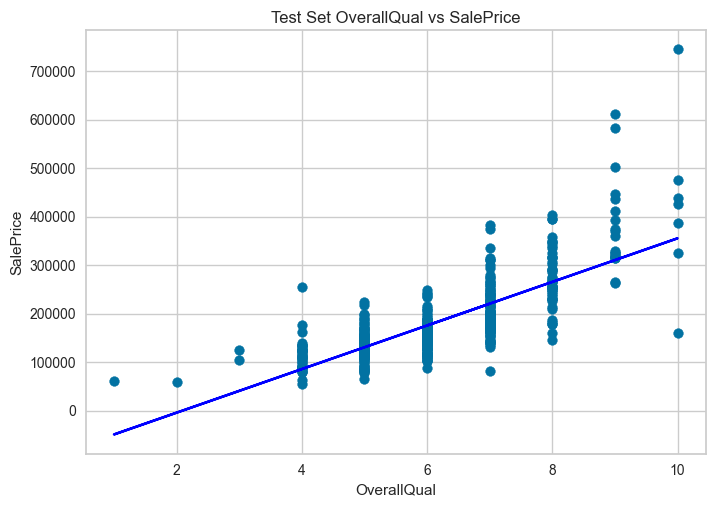

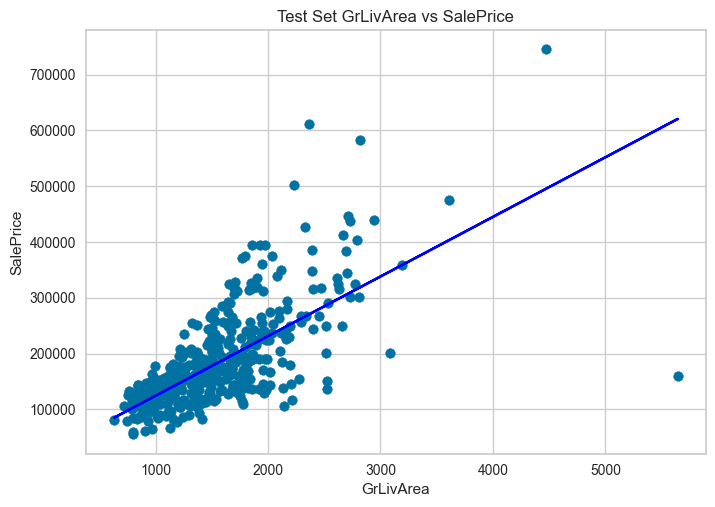

In [74]:
#Graficos de test

fig = plt.figure()
plt.scatter(overallq_t,saleprice1_t)
plt.plot(overallq_t, saleprice1_pred, color="blue")
plt.xlabel("OverallQual")
plt.ylabel("SalePrice")
plt.title("Test Set OverallQual vs SalePrice")

print("Mean Squared Error: %.2f"%mean_squared_error(saleprice1_t,saleprice1_pred))
print("R squared: %.2f"%r2_score(saleprice1_t,saleprice1_pred))

fig = plt.figure()
plt.scatter(gla_t,saleprice2_t)
plt.plot(gla_t, saleprice2_pred, color="blue")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.title("Test Set GrLivArea vs SalePrice")

print("Mean Squared Error: %.2f"%mean_squared_error(saleprice2_t,saleprice2_pred))
print("R squared: %.2f"%r2_score(saleprice2_t,saleprice2_pred))
print('A pesar de ser las 2 mejores variables en los graficos de dispersion estas no describen idealmente a la variable SalePrice describiendo solo un 47 y 60 por ciento respectivamente de su variabilidad.')

Los residuos de la variable OverallQual no parecen estar uniformemente distribuidos ademas dado el valor p del test de normalidad tambien podemos descartar la hipotesis nula de que estos sigan una distribucion normal.


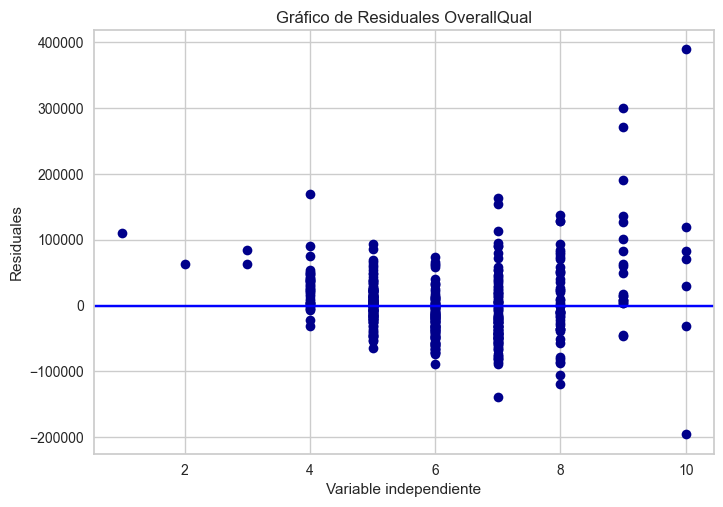

In [75]:
#Graficos de residuales OverallQual

residuales1 = saleprice1_t - saleprice1_pred
plt.plot(overallq_t,residuales1, 'o', color='darkblue')
plt.axhline(0,color='blue')
plt.title("Gráfico de Residuales OverallQual")
plt.xlabel("Variable independiente")
plt.ylabel("Residuales")

print('Los residuos de la variable OverallQual no parecen estar uniformemente distribuidos ademas dado el valor p del test de normalidad tambien podemos descartar la hipotesis nula de que estos sigan una distribucion normal.')

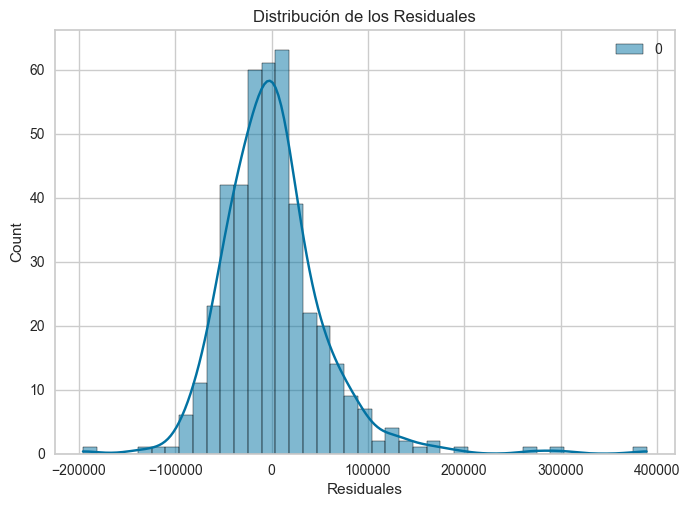

NormaltestResult(statistic=array([201.38856033]), pvalue=array([1.85793179e-44]))

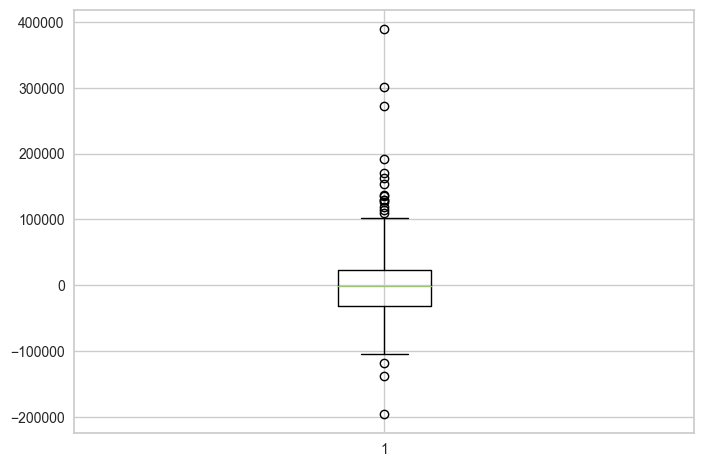

In [76]:
#Histograma residuales OverallQual

sns.histplot(residuales1, kde=True)
plt.xlabel("Residuales")
plt.title("Distribución de los Residuales")
plt.show()

#Caja y bigote
plt.boxplot(residuales1)

normaltest(residuales1)

Los residuos de la variable OverallQual parecen tener cierta tendencia por lo que no estan uniformemente distribuidos ademas dado el valor p del test de normalidad tambien podemos descartar la hipotesis nula de que estos sigan una distribucion normal.


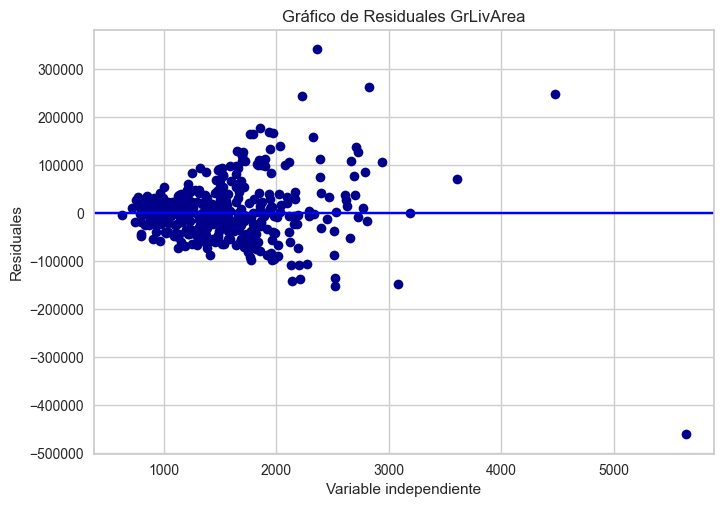

In [77]:
#Graficos de residuales GrLivArea

residuales2 = saleprice2_t - saleprice2_pred
plt.plot(gla_t,residuales2, 'o', color='darkblue')
plt.axhline(0,color='blue')
plt.title("Gráfico de Residuales GrLivArea")
plt.xlabel("Variable independiente")
plt.ylabel("Residuales")

print('Los residuos de la variable OverallQual parecen tener cierta tendencia por lo que no estan uniformemente distribuidos ademas dado el valor p del test de normalidad tambien podemos descartar la hipotesis nula de que estos sigan una distribucion normal.')

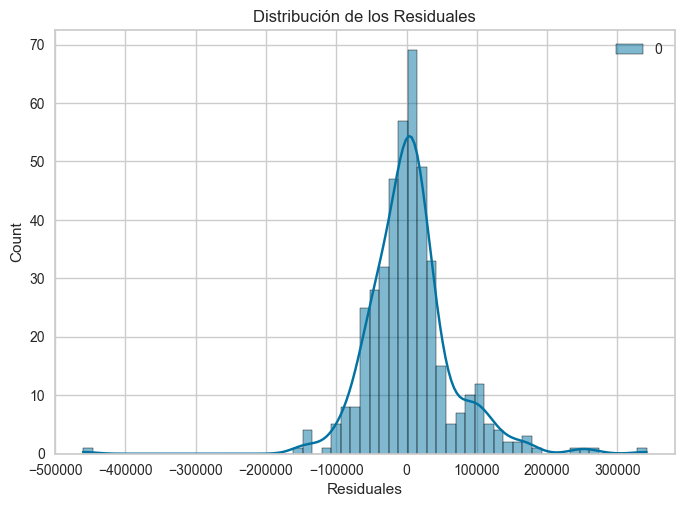

NormaltestResult(statistic=array([88.1942196]), pvalue=array([7.06103797e-20]))

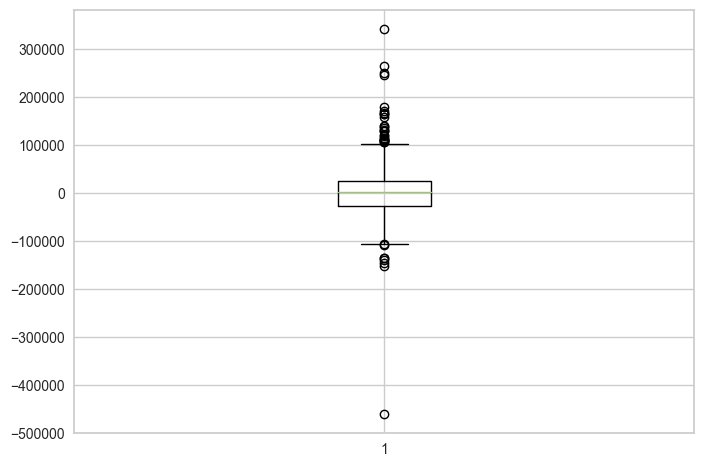

In [78]:
#Histograma de residuales GrLivArea
sns.histplot(residuales2, kde=True)
plt.xlabel("Residuales")
plt.title("Distribución de los Residuales")
plt.show()

#Caja y bigote
plt.boxplot(residuales2)

normaltest(residuales2)

In [79]:
# Analisis de coeficientes OverallQual

est = sm.OLS(saleprice1,overallq)
est2 = est.fit()
print(est2.summary())
print('Dado el valor p podemos descartar la hipotesis nula de que los coeficientes de la variable independiente son 0.')

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.933
Model:                            OLS   Adj. R-squared (uncentered):              0.933
Method:                 Least Squares   F-statistic:                          1.420e+04
Date:                Sun, 02 Mar 2025   Prob (F-statistic):                        0.00
Time:                        20:14:28   Log-Likelihood:                         -12503.
No. Observations:                1021   AIC:                                  2.501e+04
Df Residuals:                    1020   BIC:                                  2.501e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [80]:
# Analisis de coeficiente de GrLivArea

est = sm.OLS(saleprice2,gla)
est2 = est.fit()
print(est2.summary())
print('Dado el valor p podemos descartar la hipotesis nula de que los coeficientes de la variable independiente son 0.')

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.925
Model:                            OLS   Adj. R-squared (uncentered):              0.925
Method:                 Least Squares   F-statistic:                          1.251e+04
Date:                Sun, 02 Mar 2025   Prob (F-statistic):                        0.00
Time:                        20:14:28   Log-Likelihood:                         -12563.
No. Observations:                1021   AIC:                                  2.513e+04
Df Residuals:                    1020   BIC:                                  2.513e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [81]:
# Crossvalidation

model = LinearRegression()
scores = cross_val_score(model, X_test, y_test, cv=5)  # 5-fold cross-validation
print("Cross-validation scores:", scores)
print("Mean score:", scores.mean())

print('Los modelos planteados parecen estar overfitted por lo que ninguno de los 2 modelos generados parece ser el mejor predictor para SalePrice')

Cross-validation scores: [0.77064531 0.67503035 0.14057104 0.79908141 0.78553654]
Mean score: 0.6341729317205441
Los modelos planteados parecen estar overfitted por lo que ninguno de los 2 modelos generados parece ser el mejor predictor para SalePrice


# - Modelo con todas las variables numericas #

Dado que los modelos con una variable no parecieron adecuarse correctamente para describir la variable SalePrice se realizara un modelo multivariable utilizando las variables que se considera podrian ser mejores predictoras de SalePrice

In [82]:
modelo1 = LinearRegression()
modelo1.fit(X_train, y_train)
y_pred_modelo1 = modelo1.predict(X_test)

#Resumen del modelo
sm.OLS(y_train,X_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.971
Model:                            OLS   Adj. R-squared (uncentered):              0.971
Method:                 Least Squares   F-statistic:                              2816.
Date:                Sun, 02 Mar 2025   Prob (F-statistic):                        0.00
Time:                        20:14:28   Log-Likelihood:                         -12075.
No. Observations:                1021   AIC:                                  2.417e+04
Df Residuals:                    1009   BIC:                                  2.423e+04
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
OverallQual           1.853e+04   1266.826     14.631      0.000     1.6e+04     2.1e+04
GrLivArea               49.2368      4.509     10.920      0.000      40.389      58.085
TotalBsmtSF             24.9931      4.586      5.450      0.000      15.993      33.993
GarageCars            1.184e+04   3420.124      3.462      0.001    5127.520    1.86e+04
GarageArea              15.7175     11.361      1.383      0.167      -6.577      38.012
1stFlrSF                 2.5832      5.128      0.504      0.615      -7.479      12.646
YearBuilt               92.1076     48.803      1.887      0.059      -3.659     187.874
YearRemodAdd          -110.5295     48.266     -2.290      0.022    -205.243     -15.816
FullBath              3309.7034   3307.096      1.001      0.317   -3179.871    9799.278
TotRmsAbvGrd         -3916.5914   1166.880     -3.356      0.001   -6206.381   -1626.802
Cluster_KMeans       -9647.6735   1112.925     -8.669      0.000   -1.18e+04   -7463.761
Cluster_Hierarchical  1.019e+04   2067.372      4.927      0.000    6129.577    1.42e+04
==============================================================================
Omnibus:                      265.150   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12553.486
Skew:                           0.312   Prob(JB):                         0.00
Kurtosis:                      20.167   Cond. No.                     1.24e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.24e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [83]:
# calculate aic for regression 
def calculate_aic(n, mse, num_params):
 aic = n * np.log(mse) + 2 * num_params
 return aic
# calculate bic for regression
def calculate_bic(n, mse, num_params):
 bic = n * np.log(mse) + num_params * np.log(n)
 return bic

# Regression metrics
explained_variance_modelo1=metrics.explained_variance_score(y_test, y_pred_modelo1)
mean_absolute_error_modelo1=metrics.mean_absolute_error(y_test, y_pred_modelo1) 
mse_modelo1=metrics.mean_squared_error(y_test, y_pred_modelo1) 
mean_squared_log_error_modelo1=metrics.mean_squared_log_error(y_test, y_pred_modelo1)
median_absolute_error_modelo1=metrics.median_absolute_error(y_test, y_pred_modelo1)
r2_modelo1=metrics.r2_score(y_test, y_pred_modelo1)
k = modelo1.coef_.size
n = X_train.shape[0]
aic_modelo1 = calculate_aic(n,mse_modelo1,k)
bic_modelo1 = calculate_bic(n,mse_modelo1,k)

print('explained_variance: ', round(explained_variance_modelo1,4))   
print('mean_squared_log_error: ', round(mean_squared_log_error_modelo1,4))
print('r2: ', round(r2_modelo1,4))
print('MAE: ', round(mean_absolute_error_modelo1,4))
print('MSE: ', round(mse_modelo1,4))
print('RMSE: ', round(np.sqrt(mse_modelo1),4))
print('AIC: ',round(aic_modelo1,4))
print('BIC: ',round(bic_modelo1,4))

explained_variance:  0.746
mean_squared_log_error:  0.0335
r2:  0.7455
MAE:  23597.6583
MSE:  1867908727.648
RMSE:  43219.3097
AIC:  21820.3951
BIC:  21879.5376


Text(0, 0.5, 'Residuales')

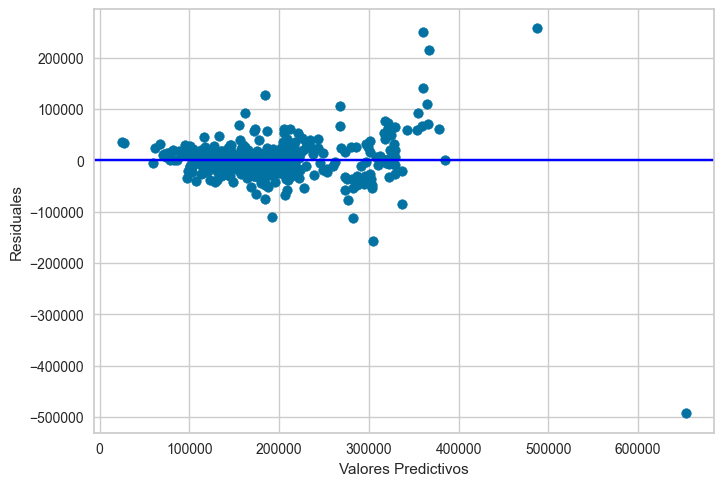

In [84]:
#Grafico de residuales

resid_modelo1=y_test-y_pred_modelo1
plt.scatter(y_pred_modelo1,resid_modelo1)
plt.axhline(0,color='blue')
plt.xlabel('Valores Predictivos')
plt.ylabel('Residuales')


In [85]:
k,p=sm.stats.diagnostic.lilliefors(resid_modelo1)
print("p =",p)

print('Los residuos no parecen estar distruibuidos uniformemente ademas en base al test de lilliefors podemos rechazar la hipotesis nula de que estos sigan una distribucion normal')

p = 0.0009999999999998899
Los residuos no parecen estar distruibuidos uniformemente ademas en base al test de lilliefors podemos rechazar la hipotesis nula de que estos sigan una distribucion normal


In [86]:
x_pred_modelo1 = modelo1.predict(X_train)
mse_modelo1_train=metrics.mean_squared_error(y_train, x_pred_modelo1) 

print("MES_train: ",round(mse_modelo1_train,4))
print('MSE_test: ', round(mse_modelo1,4))

MES_train:  1010571995.9024
MSE_test:  1867908727.648


In [87]:
lr = LinearRegression()

# Crea un modelo de seleccion de predicrores stepwise backward, con un k-fold de 5 en la validación cruzada
seleccionPredictores = SequentialFeatureSelector(lr, direction='backward', cv=5)
seleccionPredictores.fit(X_train, y_train)

# Extrae los índices de los predictores
indicePredictores= seleccionPredictores.get_support(indices=True)



# Variables seleccionadas
columnas = X_train.columns

print("Predictores:   ")

for i in indicePredictores:
    print(columnas[i])

Predictores:   
OverallQual
GrLivArea
TotalBsmtSF
GarageCars
YearBuilt
Cluster_KMeans


Multicolinealidad